In [1]:
import matplotlib.pyplot as plt
import arviz as az
import numpyro

numpyro.set_host_device_count(2)

from lqg.io import load_tracking_data

data, blob_widths = load_tracking_data()
data.shape

(6, 20, 1068, 2)

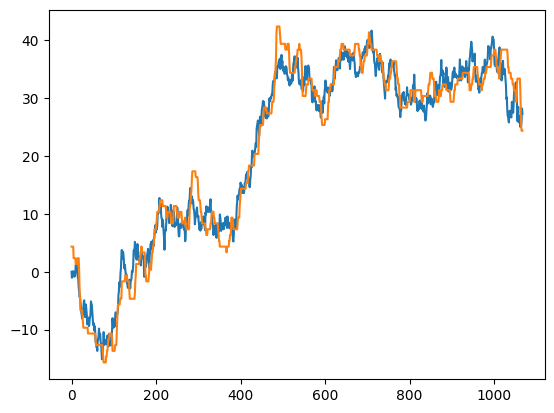

In [2]:
plt.plot(data[0, 0, :, 0])
plt.plot(data[0, 0, :, 1])

In [ ]:
from lqg.infer import infer
from lqg.infer.models import lifted_common_model as common_lqg_model
from lqg.tracking import BoundedActor, IdealObserver

models = {"IdealObserver": IdealObserver, "BoundedActor": BoundedActor}
results = {}

for model_name, model in models.items():
    res = infer(data, method="nuts", model=model, numpyro_fn=common_lqg_model,
            seed=123, num_samples=1000, num_warmup=500, num_chains=2)

    results[model_name] = az.convert_to_inference_data(res)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


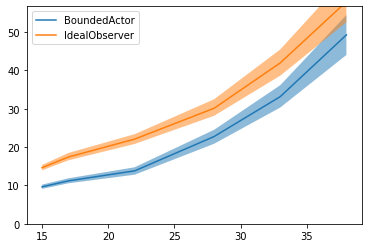

In [55]:
for model_name, inference_data in sorted(results.items()):
    summary = az.summary(inference_data.posterior, var_names=[f"sigma_{i}" for i in range(6)])
    plt.plot(blob_widths, summary["mean"], label=model_name)
    plt.fill_between(blob_widths, summary["hdi_3%"], summary["hdi_97%"], alpha=0.5)
    plt.ylim(0,)
plt.legend()